In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
path1 = "https://media.githubusercontent.com/media/mannbansal/ime672/ceaeaf84b65882ab7287691dab7211c1bbff2999/mortgage.csv"

In [ ]:
df=pd.read_csv(path1)

## Problem Statement

The dataset given to us represents period data for US loans taken with unspecificed uniform periods. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The data contains various attributes of mortgage-level-loans which occured in the history as well as the end of the loan for the bank.

Our dataset Contains 6,00,000 entries over 50,000 loans having default, pay_off and loan continuance.

id: Borrower ID

time: Time stamp of observation

orig_time: Time stamp for origination

first_time: Time stamp for first observation

mat_time: Time stamp for maturity

balance_time: Outstanding balance at observation time

LTV_time: Loan-to-value ratio at observation time, in %

interest_rate_time: Interest rate at observation time, in %

hpi_time: House price index at observation time, base year = 100

gdp_time: Gross domestic product (GDP) growth at observation time, in %

uer_time: Unemployment rate at observation time, in %

REtype_CO_orig_time: Real estate type condominium = 1, otherwise = 0

REtype_PU_orig_time: Real estate type planned urban development = 1, otherwise = 0

REtype_SF_orig_time: Single-family home = 1, otherwise = 0

investor_orig_time: Investor borrower = 1, otherwise = 0

balance_orig_time: Outstanding balance at origination time

FICO_orig_time: FICO score at origination time, in %

LTV_orig_time: Loan-to-value ratio at origination time, in %

Interest_Rate_orig_time: Interest rate at origination time, in %

hpi_orig_time: House price index at origination time, base year = 100

default_time: Default observation at observation time

payoff_time: Payoff observation at observation time

status_time: Default (1), payoff (2), and nondefault/nonpayoff (0) observation at observation time

Objectives:-
1. Data pre-processing & Exploratory Data Analysis for relations between attributes.
2. Bank Perspective: Predicting whether a loan will be payed-off, defaulted or be continued form the bank's perspective.
3. Customer Perspective: Determining whether its better to continue paying a loan (even in unfavourable conditions) or to default early as which would have happended eventually and save money as given to the bank.

## Dataset


In [ ]:
df.head(24)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
5,1,30,-7,25,113,40127.97,25.318291,9.2,212.73,2.274218,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
6,1,31,-7,25,113,39718.66,26.566117,9.2,200.67,1.850689,4.7,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
7,1,32,-7,25,113,35877.03,25.872559,9.2,186.12,1.104163,5.0,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
8,1,33,-7,25,113,34410.03,25.584425,9.2,180.52,0.836859,5.0,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
9,1,34,-7,25,113,33590.47,26.008073,9.2,173.35,-0.314448,5.8,0,0,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [ ]:
df.head(67).tail(37)

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
30,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,4.5,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,2
31,4,25,-2,25,119,61031.10,33.911009,10.500,226.29,2.899137,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
32,4,26,-2,25,119,60882.42,34.007232,10.500,225.10,2.151365,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
33,4,27,-2,25,119,60729.80,34.335349,10.500,222.39,2.361722,4.4,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
34,4,28,-2,25,119,60576.14,34.672545,10.875,219.67,1.229172,4.6,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
35,4,29,-2,25,119,60424.39,34.951639,10.875,217.37,1.692969,4.5,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
36,4,30,-2,25,119,60268.48,35.621842,10.875,212.73,2.274218,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
37,4,31,-2,25,119,60108.28,37.662290,10.875,200.67,1.850689,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
38,4,32,-2,25,119,59944.71,40.496053,11.000,186.12,1.104163,5.0,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0
39,4,33,-2,25,119,59778.68,41.636658,11.000,180.52,0.836859,5.0,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0


In a specific data point:-

LTV_orig_time,FICO_orig_time,balance_orig_time, id , orig_time,first_time,mat_time,Interest_Rate_orig_time,hpi_orig_time: Constant Attribute

time: Nominal Attribute (Redundant can be changed to starting and ending period)

uer_time,gdp_time,hpi_time,interest_rate_time, LTV_time,balance_time: Time series real value data.

investor_orig_time, REtype_CO_orig_time, REtype_PU_orig_time, REtype_SF_orig_time: Constant Binary Data 

default_time, payoff_time,status_time: Default (1), payoff (2), and nondefault/nonpayoff (0) observation at observation time ( Just represents a simple class attribute therefore can be combined)


## Data Preprocessing

## Data Cleaning

In [ ]:
count_of_NaN = df.isnull().sum().sum()
print(count_of_NaN)

ldict = {}
for col in df.columns:
    ldict[col] = df[col].isnull().sum()
print(ldict)
print(ldict["LTV_time"])

270
{'id': 0, 'time': 0, 'orig_time': 0, 'first_time': 0, 'mat_time': 0, 'balance_time': 0, 'LTV_time': 270, 'interest_rate_time': 0, 'hpi_time': 0, 'gdp_time': 0, 'uer_time': 0, 'REtype_CO_orig_time': 0, 'REtype_PU_orig_time': 0, 'REtype_SF_orig_time': 0, 'investor_orig_time': 0, 'balance_orig_time': 0, 'FICO_orig_time': 0, 'LTV_orig_time': 0, 'Interest_Rate_orig_time': 0, 'hpi_orig_time': 0, 'default_time': 0, 'payoff_time': 0, 'status_time': 0}
270


In [ ]:
df = df.dropna()

In [ ]:
df[(df["balance_time"]==0) & (df["status_time"]!=2)]

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
1142,127,32,21,25,142,0.0,0.0,8.850,186.12,1.104163,5.0,0,0,1,0,144880.00,674,80.0,6.850,208.86,0,0,0
23198,2384,16,16,16,128,0.0,0.0,11.000,167.91,4.320114,5.7,0,0,1,0,138550.00,515,85.0,11.000,167.91,0,0,0
38028,3920,44,25,27,145,0.0,0.0,8.800,150.91,1.875515,9.2,0,0,1,0,288750.00,619,75.0,8.800,226.29,0,0,0
39825,4105,36,25,28,145,0.0,0.0,11.575,151.48,-3.516568,7.8,0,0,0,0,61800.00,622,100.0,11.575,226.29,0,0,0
46232,4661,34,28,30,148,0.0,0.0,7.000,173.35,-0.314448,5.8,0,0,1,0,400000.00,639,80.0,7.000,219.67,0,0,0
76448,7417,37,26,27,186,0.0,0.0,5.772,153.35,-4.146711,9.0,0,0,1,1,350000.00,760,70.0,1.400,225.10,0,0,0
77636,7497,41,26,28,147,0.0,0.0,3.794,161.06,2.682497,9.9,0,0,1,0,396000.00,670,90.0,1.000,225.10,0,0,0
107967,10333,32,25,29,146,0.0,0.0,6.750,186.12,1.104163,5.0,0,0,1,0,425000.00,762,78.7,6.750,226.29,0,0,0
137524,12393,53,-3,20,117,0.0,0.0,9.250,173.17,0.892996,7.6,0,0,0,0,35754.05,666,87.7,9.250,95.10,0,0,0
276773,22008,47,29,31,149,0.0,0.0,8.250,149.58,1.668182,8.8,0,0,0,1,612000.00,706,80.0,8.250,217.37,0,0,0


## Data Structuring

In [ ]:
df['balance_time']=df['balance_time']/df['balance_orig_time']

### Creating Individual DataSet Tables. 

In [ ]:
df1=df[['id','uer_time','gdp_time','hpi_time','interest_rate_time', 'LTV_time','balance_time']].copy()
df2=df.drop(['first_time','uer_time','gdp_time','hpi_time','interest_rate_time', 'LTV_time','balance_time','time','status_time','investor_orig_time'],axis=1).copy()
df3=df.drop(['first_time','uer_time','hpi_time','time','payoff_time','default_time'],axis=1).copy()

In [ ]:
df1.shape

(622219, 7)

In [ ]:
df3.head()

,id,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
0,1,-7,113,0.917854,24.498336,9.2,2.899137,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
1,1,-7,113,0.912488,24.483867,9.2,2.151365,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
2,1,-7,113,0.906765,24.626795,9.2,2.361722,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
3,1,-7,113,0.899642,24.735883,9.2,1.229172,0,0,1,0,45000.0,715,69.4,9.2,87.03,0
4,1,-7,113,0.897046,24.925476,9.2,1.692969,0,0,1,0,45000.0,715,69.4,9.2,87.03,0


In [ ]:
df2_tmp= df2.groupby("id").last()
df3_tmp = df3.groupby("id").last()
df2_tmp.head(5)

,orig_time,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time
id,,,,,,,,,,,,
1,-7,113,0,0,1,45000.0,715,69.4,9.200,87.03,1,0
2,18,138,0,0,1,107200.0,558,80.0,7.680,186.91,0,1
3,-6,114,0,0,1,48600.0,680,83.6,8.750,89.58,0,1
4,-2,119,0,0,1,63750.0,587,81.8,10.500,97.99,0,0
5,18,138,0,0,1,52800.0,527,80.0,9.155,186.91,0,1


In [ ]:
df3_tmp.head()

,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
id,,,,,,,,,,,,,,,,
1,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,2
3,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,2
4,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
5,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,2


In [ ]:
df2_tmp['interval']=df2.groupby(by='id').count().iloc[:,0]
df3_tmp['interval']=df3.groupby(by='id').count().iloc[:,0]
del df2
del df3
df2_tmp.head(5)
print(df2_tmp.isnull().sum())
#print(df3_tmp.isnull().sum())
df2_tmp.columns

orig_time                  0
mat_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
default_time               0
payoff_time                0
interval                   0
dtype: int64


Index(['orig_time', 'mat_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'interval'],
      dtype='object')

In [ ]:
df2_tmp = df2_tmp[[ 'interval','orig_time', 'mat_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time',
       'REtype_SF_orig_time', 'balance_orig_time',
       'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time',
       'hpi_orig_time', 'default_time', 'payoff_time']]
df2_tmp.shape

(49982, 13)

In [ ]:
df3_tmp.columns

Index(['orig_time', 'mat_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'gdp_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'hpi_orig_time', 'status_time', 'interval'],
      dtype='object')

In [ ]:
df3_tmp = df3_tmp[['interval','orig_time', 'mat_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'gdp_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'hpi_orig_time', 'status_time']]

In [ ]:
df3_tmp.shape

(49982, 17)

In [ ]:
df2_tmp.nunique(axis=0)

interval                      52
orig_time                     98
mat_time                     200
REtype_CO_orig_time            2
REtype_PU_orig_time            2
REtype_SF_orig_time            2
balance_orig_time          10690
FICO_orig_time               397
LTV_orig_time                552
Interest_Rate_orig_time     1704
hpi_orig_time                 97
default_time                   2
payoff_time                    2
dtype: int64

In [ ]:
print("No of Real estate type condominium:")
print(len(df2_tmp[df2_tmp["REtype_CO_orig_time"]==1]))
print("No of Real estate type condominium that were defaulted")
print(len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["default_time"]==1)]))
print("No of Real estate type condominium that were paid off:")
print(len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["payoff_time"]==1)]))
print("No of Real estate type condominium that were NonPayoff/NonDefault:")
print(len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["default_time"]==0) & (df2_tmp["payoff_time"]==0)]))

No of Real estate type condominium:
3248
No of Real estate type condominium that were defaulted
1022
No of Real estate type condominium that were paid off:
1718
No of Real estate type condominium that were NonPayoff/NonDefault:
508


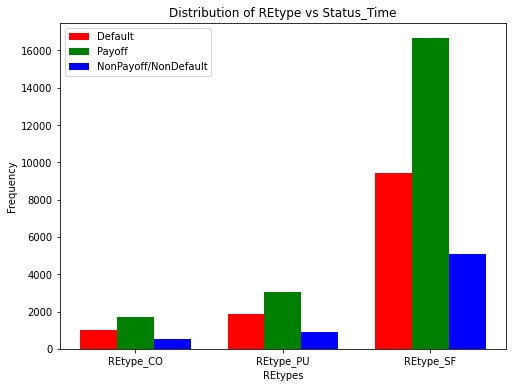

In [ ]:
grp1 = [len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["default_time"]==1)]),len(df2_tmp[(df2_tmp["REtype_PU_orig_time"]==1) & (df2_tmp["default_time"]==1)]),len(df2_tmp[(df2_tmp["REtype_SF_orig_time"]==1) & (df2_tmp["default_time"]==1)])]
grp2 = [len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["payoff_time"]==1)]),len(df2_tmp[(df2_tmp["REtype_PU_orig_time"]==1) & (df2_tmp["payoff_time"]==1)]),len(df2_tmp[(df2_tmp["REtype_SF_orig_time"]==1) & (df2_tmp["payoff_time"]==1)])]
grp3 = [len(df2_tmp[(df2_tmp["REtype_CO_orig_time"]==1) & (df2_tmp["default_time"]==0) & (df2_tmp["payoff_time"]==0)]),len(df2_tmp[(df2_tmp["REtype_PU_orig_time"]==1) & (df2_tmp["default_time"]==0) & (df2_tmp["payoff_time"]==0)]),len(df2_tmp[(df2_tmp["REtype_SF_orig_time"]==1) & (df2_tmp["default_time"]==0) & (df2_tmp["payoff_time"]==0)])]

N = 3
ind = np.arange(N) 
width = 0.25
plt.figure(figsize=(8,6))  
bar1 = plt.bar(ind, grp1, width, color = 'r')
bar2 = plt.bar(ind+width, grp2, width, color='g')
bar3 = plt.bar(ind+width*2, grp3, width, color = 'b')
  
plt.xlabel("REtypes")
plt.ylabel('Frequency')
plt.title("Distribution of REtype vs Status_Time")
  
plt.xticks(ind+width,['REtype_CO', 'REtype_PU', 'REtype_SF'])
plt.legend( (bar1, bar2, bar3), ('Default', 'Payoff', 'NonPayoff/NonDefault') )
plt.show()

In [ ]:
df2_tmp1 = df2_tmp.copy()

In [ ]:
df2_tmp1["status_time"]=10
df2_tmp1.loc[df2_tmp1["default_time"]==1,"status_time"]="X"
df2_tmp1.loc[df2_tmp1["payoff_time"]==1,"status_time"]="Y"
df2_tmp1.loc[(df2_tmp1["payoff_time"]==0) & (df2_tmp1["default_time"]==0),"status_time"]="Z"
df2_tmp1.reset_index(inplace=True)
df2_tmp2 = df2_tmp1.copy()
#df2_tmp1.loc[2034]

In [ ]:
df2_tmp1.reset_index(drop=True).head()

,id,interval,orig_time,mat_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,24,-7,113,0,0,1,45000.0,715,69.4,9.200,87.03,1,0,X
1,2,2,18,138,0,0,1,107200.0,558,80.0,7.680,186.91,0,1,Y
2,3,5,-6,114,0,0,1,48600.0,680,83.6,8.750,89.58,0,1,Y
3,4,35,-2,119,0,0,1,63750.0,587,81.8,10.500,97.99,0,0,Z
4,5,3,18,138,0,0,1,52800.0,527,80.0,9.155,186.91,0,1,Y


In [ ]:
df2_tmp2.shape

(49982, 15)

In [ ]:
df_bin = df3_tmp.copy()

In [ ]:
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time
id,,,,,,,,,,,,,,,,,
1,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
2,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,2
3,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,2
4,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
5,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,2


In [ ]:
df_bin["status_time_new"]=10
df_bin.loc[df_bin["status_time"]==0,"status_time_new"]=1
df_bin.loc[df_bin["status_time"]==1,"status_time_new"]=0
df_bin.loc[df_bin["status_time"]==2,"status_time_new"]=1
df_bin.reset_index(inplace=True)
#df2_tmp2 = df2_tmp1.copy()
#df2_tmp1.loc[2034]

In [ ]:
df_bin.head()

,id,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time,status_time_new
0,1,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0
1,2,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,2,1
2,3,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,2,1
3,4,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,1
4,5,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,2,1


In [ ]:
#df_bin.drop(df_bin[df_bin['status_time']=='Z'].index, inplace = True)

In [ ]:
df_bin.shape

(49982, 19)

In [ ]:
df_bin.reset_index(inplace=True,drop=True)

In [ ]:
df_bin = df_bin.drop(["id","status_time"],axis=1)
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time_new
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,0
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,1
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,1
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,1
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,1


In [ ]:
df_bin["status_time_alpha"]=10
df_bin.loc[df_bin["status_time_new"]==0,"status_time_alpha"]="X"
df_bin.loc[df_bin["status_time_new"]==1,"status_time_alpha"]="Y"
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time_new,status_time_alpha
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,0,X
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,1,Y
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,1,Y
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,1,Y
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,1,Y


X = default and Y = payoff

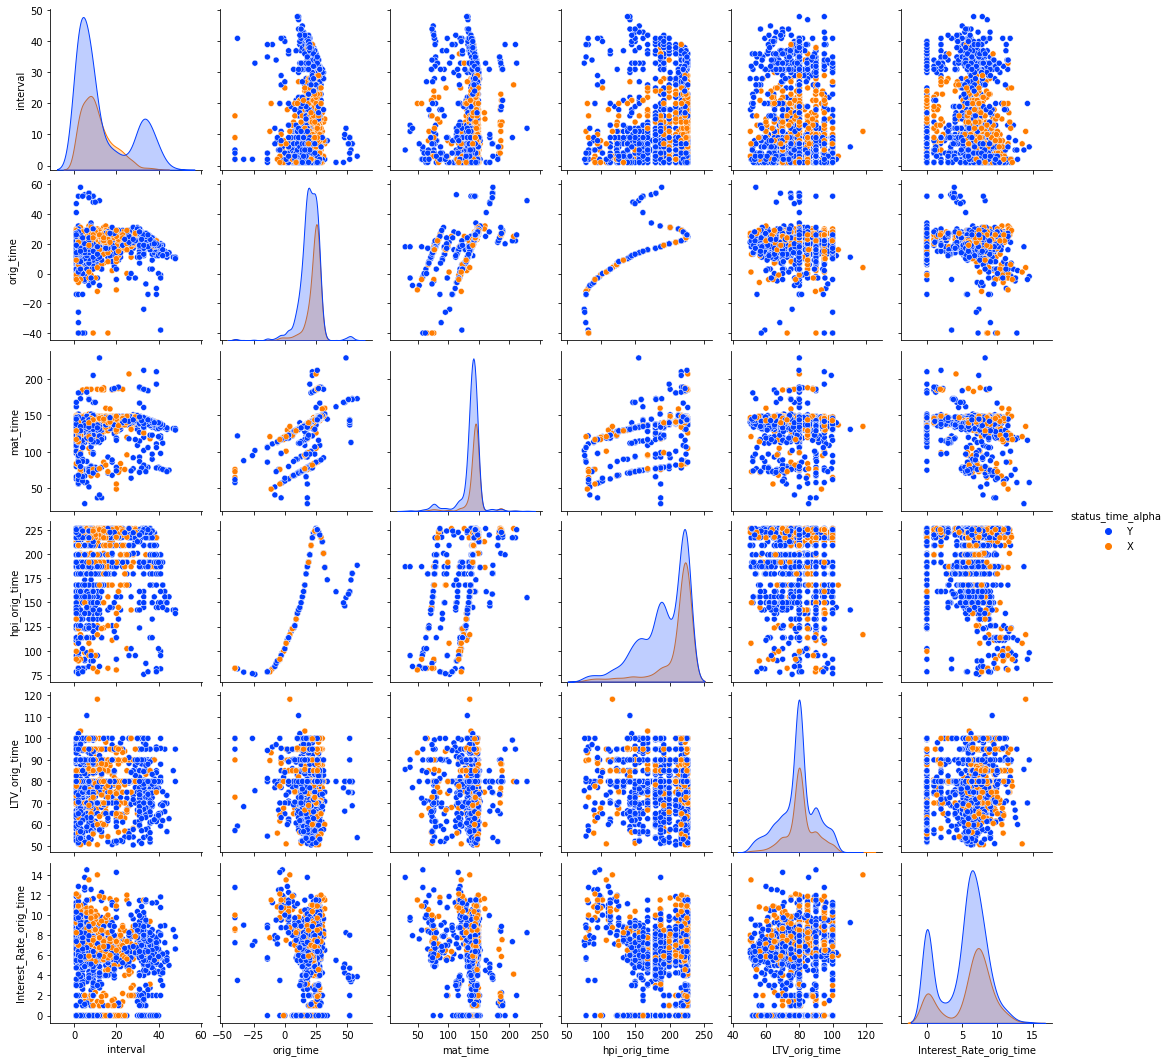

In [ ]:
sns.set_palette("bright")
sns.pairplot(df_bin.sample(2000).loc[:,['interval','orig_time','mat_time','hpi_orig_time','LTV_orig_time', 'Interest_Rate_orig_time','status_time_alpha']],hue='status_time_alpha')

In [ ]:
df1.head(60).tail(20)

,id,uer_time,gdp_time,hpi_time,interest_rate_time,LTV_time,balance_time
40,4,5.8,-0.314448,173.35,10.50,43.231936,0.934961
41,4,6.5,-2.805844,162.09,10.50,46.089096,0.932007
42,4,7.8,-3.516568,151.48,10.50,49.156858,0.928976
43,4,9.0,-4.146711,153.35,9.25,48.394751,0.925864
44,4,9.5,-3.339549,158.77,9.25,46.581410,0.922669
45,4,10.0,-0.241081,158.16,9.25,46.594884,0.919390
46,4,9.8,1.585966,156.21,9.25,47.003836,0.916024
47,4,9.9,2.682497,161.06,9.25,45.416483,0.912570
48,4,9.4,3.029499,161.00,9.25,45.256864,0.909024
49,4,9.4,2.694111,156.04,9.25,46.508449,0.905384


## Data Normalization 
In Time series data is Min-Max Scaling is done. Other attributes do not require Normalization at this stage.

## Data Imbalance

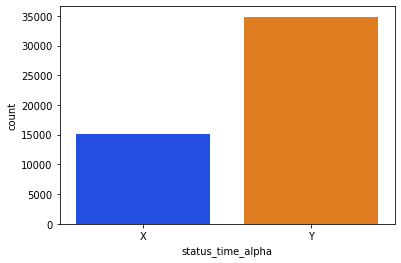

In [ ]:
sns.countplot(x="status_time_alpha",data=df_bin)

In [ ]:
df_bin[df_bin["status_time_new"]==1].shape

(34833, 18)

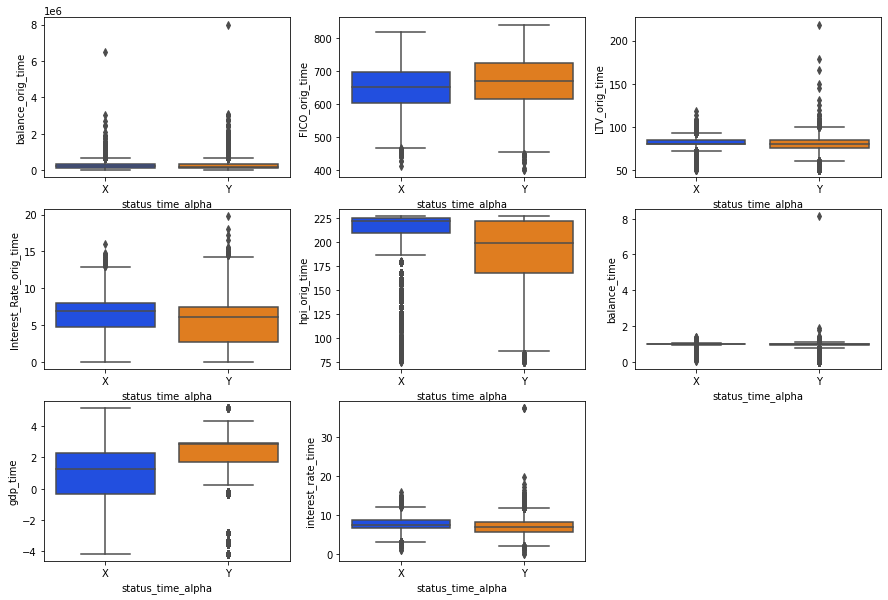

In [ ]:
ll = ['balance_orig_time', 'FICO_orig_time', 'LTV_orig_time','Interest_Rate_orig_time', 'hpi_orig_time','balance_time','gdp_time','interest_rate_time']
plt.figure(figsize=(15,10))

for i,cn_name in enumerate(ll):
    plt.subplot(3,3,i+1)
    sns.boxplot(x="status_time_alpha",y=cn_name,data=df_bin)

In [ ]:
df_bin_temp = df_bin.copy()

# Outlier Analysis And Removal

In [ ]:
for i,cn_name in enumerate(["balance_orig_time"]):
    
    Q3 = df_bin[cn_name].quantile(0.75)
    Q1 = df_bin[cn_name].quantile(0.25)
    IQR = Q3-Q1
    df_tm = df_bin[cn_name]
    x = (df_tm>Q3+1.5*IQR)
    x = pd.DataFrame(x)
    print(x[x[cn_name]==True].count())
    rows = [list(x[x[cn_name]==True].index)]
    df_bin.drop(df_bin.index[tuple(rows)],inplace=True)
    df_bin.reset_index(inplace=True,drop=True)
    #rows

balance_orig_time    1728
dtype: int64


In [ ]:
df_bin.shape

(48254, 18)

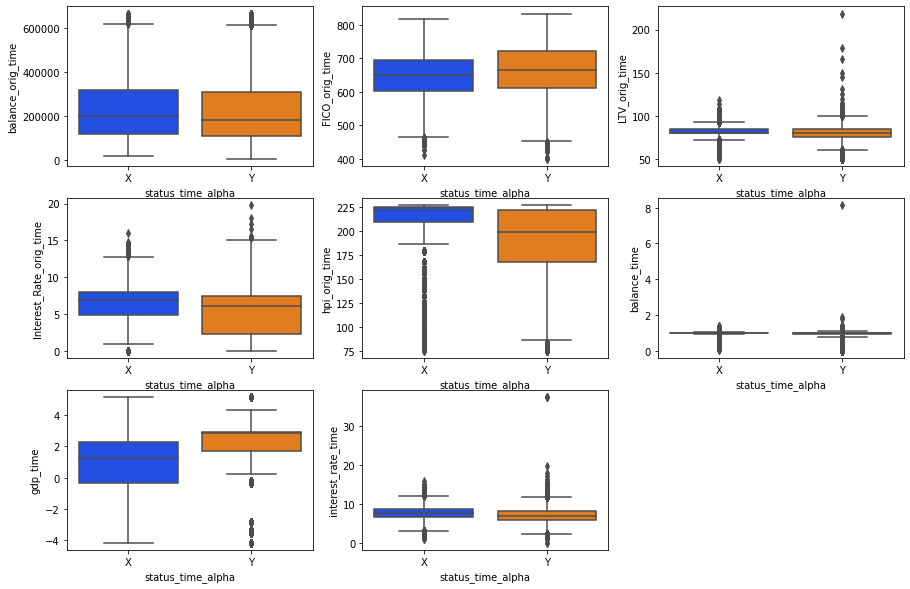

In [ ]:
#ll = ['balance_orig_time', 'FICO_orig_time', 'LTV_orig_time','Interest_Rate_orig_time', 'hpi_orig_time']
plt.figure(figsize=(15,10))

for i,cn_name in enumerate(ll):
    plt.subplot(3,3,i+1)
    sns.boxplot(x="status_time_alpha",y=cn_name,data=df_bin)

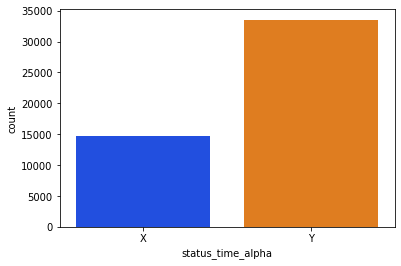

In [ ]:
sns.countplot(x="status_time_alpha",data=df_bin)

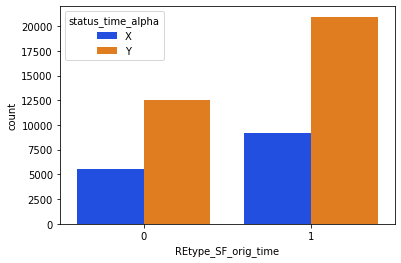

In [ ]:
sns.countplot(x="REtype_SF_orig_time",hue="status_time_alpha",data=df_bin)

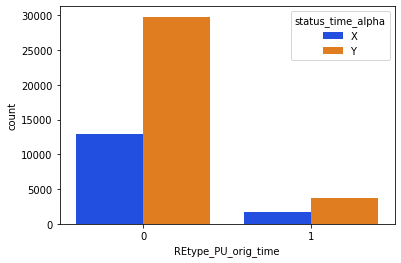

In [ ]:
sns.countplot(x="REtype_PU_orig_time",hue="status_time_alpha",data=df_bin)

In [ ]:
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,status_time_new,status_time_alpha
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,0,45000.0,715,69.4,9.200,87.03,0,X
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,0,107200.0,558,80.0,7.680,186.91,1,Y
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,0,48600.0,680,83.6,8.750,89.58,1,Y
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,0,63750.0,587,81.8,10.500,97.99,1,Y
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,0,52800.0,527,80.0,9.155,186.91,1,Y


For Objective 2, The dataset is imbalanced and therefore we will utilize techniques like Over Sampling and SMOTE.

We analyze that after ignoring outliers the default loans are having a higher LTV as compared to other classes.

FICO Score which is an important metric in giving the loans follows that in case of defaults the FICO Score distribution median is lower though the distribution is appoximately the same.

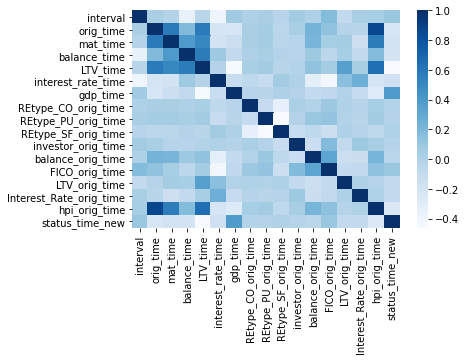

In [ ]:
sns.heatmap(df_bin.corr(),cmap="Blues")

In [ ]:
!pip install ppscore

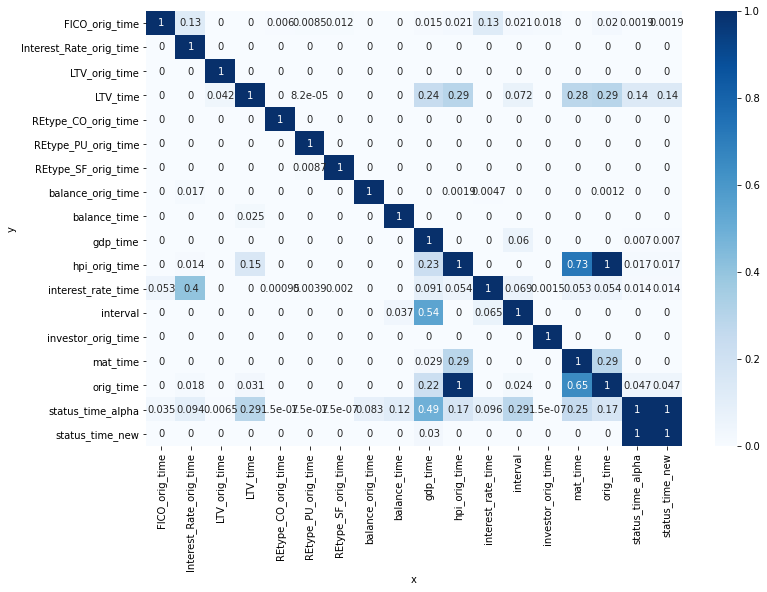

In [ ]:
plt.figure(figsize=(12,8))
import ppscore as pps
matrix=pps.matrix(df_bin).pivot(columns='x',index='y',values='ppscore')
sns.heatmap(matrix,annot=True,cmap="Blues")

In [ ]:
df_bin.shape

(48254, 18)

Dropping hpi_orig_time because according to pps matrix pps score between orig_time and hpi_orig_time is 1 so we will drop the later 

In [ ]:
df_bin = df_bin.drop(["hpi_orig_time"],axis=1)

In [ ]:
df_bin = df_bin.drop(["investor_orig_time"],axis=1)

In [ ]:
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,status_time_new,status_time_alpha
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,45000.0,715,69.4,9.200,0,X
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,107200.0,558,80.0,7.680,1,Y
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,48600.0,680,83.6,8.750,1,Y
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,63750.0,587,81.8,10.500,1,Y
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,52800.0,527,80.0,9.155,1,Y


In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()

X = sc.fit_transform(df_bin.drop(['status_time_new','status_time_alpha','REtype_CO_orig_time','REtype_PU_orig_time','REtype_SF_orig_time'],axis=1))

pca = PCA(.95)

X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.24889729 0.18723388 0.11203699 0.09924524 0.08392285 0.07212739
 0.06127661 0.05268313 0.03754823]


In [ ]:
X.shape

(48254, 9)

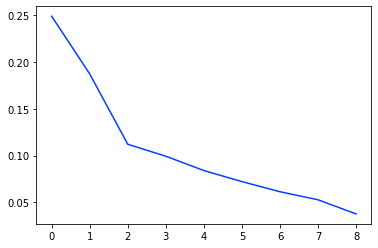

In [ ]:
plt.plot(explained_variance)

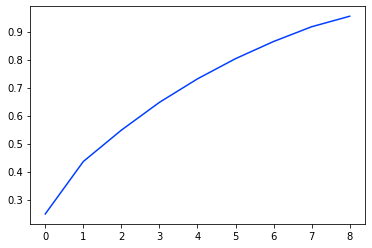

In [ ]:
plt.plot(np.cumsum(explained_variance))

In [ ]:
X = pd.DataFrame(X)
X['status_time'] = df_bin["status_time_new"]
X.head()

,0,1,2,3,4,5,6,7,8,status_time
0,-4.697451,-0.647586,-1.020169,-0.655052,0.398027,0.327129,1.053273,0.143629,1.337081,0
1,-0.831435,1.440164,0.380839,-0.055362,-0.818311,0.243329,-0.170239,-0.015788,-0.663265,1
2,-3.786651,1.688106,-0.043073,-0.724461,1.447341,0.505046,0.945848,0.136885,1.132828,1
3,-3.965859,0.757027,-1.334256,0.556655,-0.354949,0.664181,0.537643,1.507283,1.384380,1
4,-1.136089,2.152391,0.080736,-0.016136,-1.234268,0.420658,-0.218898,0.003798,-0.402909,1


In [ ]:
print(X.shape)

(48254, 10)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

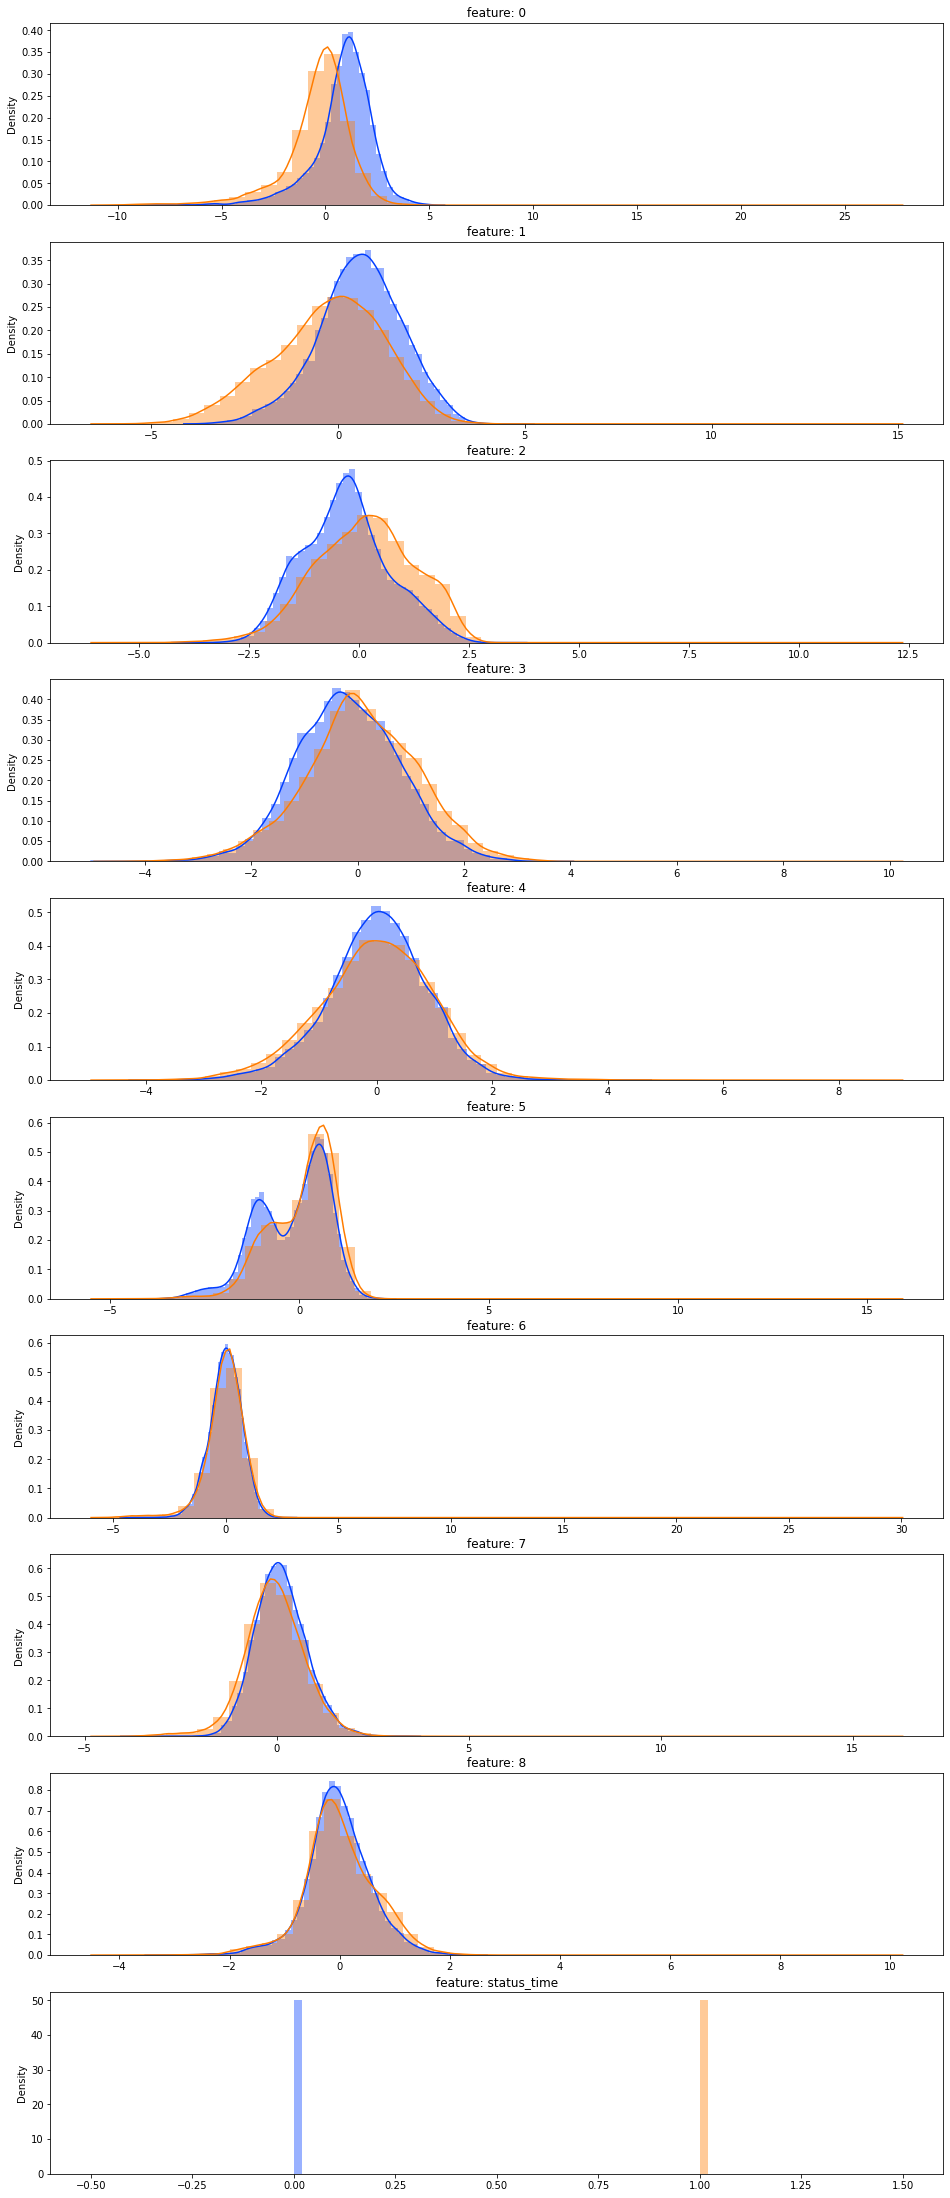

In [ ]:
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.figure(figsize=(16,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(X):
    ax = plt.subplot(gs[i])
    sns.distplot(X[X['status_time'] == 0][cn], bins=50)
    sns.distplot(X[X['status_time'] == 1][cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))

Here, we have used PCA to reduce the dependence of outliers and to approximate the data. 

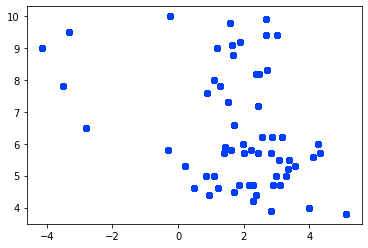

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(df1['gdp_time'],df1['uer_time'])

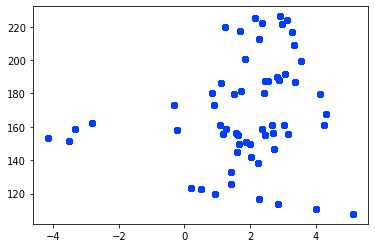

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(df1['gdp_time'],df1['hpi_time'])

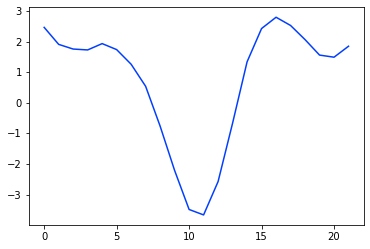

In [ ]:
plt.plot(df1[df1['id']==1]['gdp_time'].rolling(3).mean().tolist()[2:])

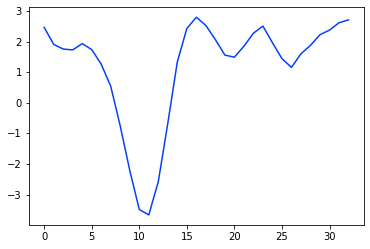

In [ ]:
plt.plot(df1[df1['id']==4]['gdp_time'].rolling(3).mean().tolist()[2:])

In [ ]:
Y = X['status_time']
X = X.drop(['status_time'],axis=1)

In [ ]:
Y.shape

(48254,)

In [ ]:
#Y = list(Y)

In [ ]:
x = X.copy()
x.shape
x.head()

,0,1,2,3,4,5,6,7,8
0,-4.697451,-0.647586,-1.020169,-0.655052,0.398027,0.327129,1.053273,0.143629,1.337081
1,-0.831435,1.440164,0.380839,-0.055362,-0.818311,0.243329,-0.170239,-0.015788,-0.663265
2,-3.786651,1.688106,-0.043073,-0.724461,1.447341,0.505046,0.945848,0.136885,1.132828
3,-3.965859,0.757027,-1.334256,0.556655,-0.354949,0.664181,0.537643,1.507283,1.384380
4,-1.136089,2.152391,0.080736,-0.016136,-1.234268,0.420658,-0.218898,0.003798,-0.402909


Future Analysis:-
    1. Using  SVM,ANN,Tree-based methods for forming a Classifier for Obj-2.
    1.2 Predictive Power Scoring will be utilized to see relations between attributes.
    2. Usig ARIMA and moving-average  we would be using forming a predicter in probablity for future scenarios. 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
Y=Y.astype('int')

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
Y_label= label_encoder.fit_transform(Y)
  
Y_label

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
df_bin.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,status_time_new,status_time_alpha
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,45000.0,715,69.4,9.200,0,X
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,107200.0,558,80.0,7.680,1,Y
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,48600.0,680,83.6,8.750,1,Y
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,63750.0,587,81.8,10.500,1,Y
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,52800.0,527,80.0,9.155,1,Y


In [ ]:
X_ori = df_bin.drop(["status_time_new","status_time_alpha"],axis=1)
X_ori.head()
#Y_ori = list(X_ori["status_time"])

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,45000.0,715,69.4,9.200
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,107200.0,558,80.0,7.680
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,48600.0,680,83.6,8.750
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,63750.0,587,81.8,10.500
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,52800.0,527,80.0,9.155


# Decision Tree with original features as mentioned above

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_ori,Y_label,test_size=0.3,random_state=42)

In [ ]:
parameters = {'max_depth':range(3,20),'criterion':['gini','entropy']}

clf_dt_ori = GridSearchCV(DecisionTreeClassifier(),parameters,scoring='roc_auc',cv=5,n_jobs=-1)
clf_dt_ori.fit(x_train,y_train)
tree_model1 = clf_dt_ori.best_estimator_
print(clf_dt_ori.best_score_,clf_dt_ori.best_params_)

0.8720783743452876 {'criterion': 'entropy', 'max_depth': 7}


In [ ]:
pred = dt_ori.predict(x_train)
accuracy_score(y_train,pred)

0.8266275868194334

In [ ]:
dt_ori = DecisionTreeClassifier(**clf_dt_ori.best_params_,random_state=42)
dt_ori.fit(x_train,y_train)
pred = dt_ori.predict(x_test)
accuracy_score(y_test,pred)

0.8132900462803067

In [ ]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

0.8440512964523074
0.8968569723493137
0.8696532767516998


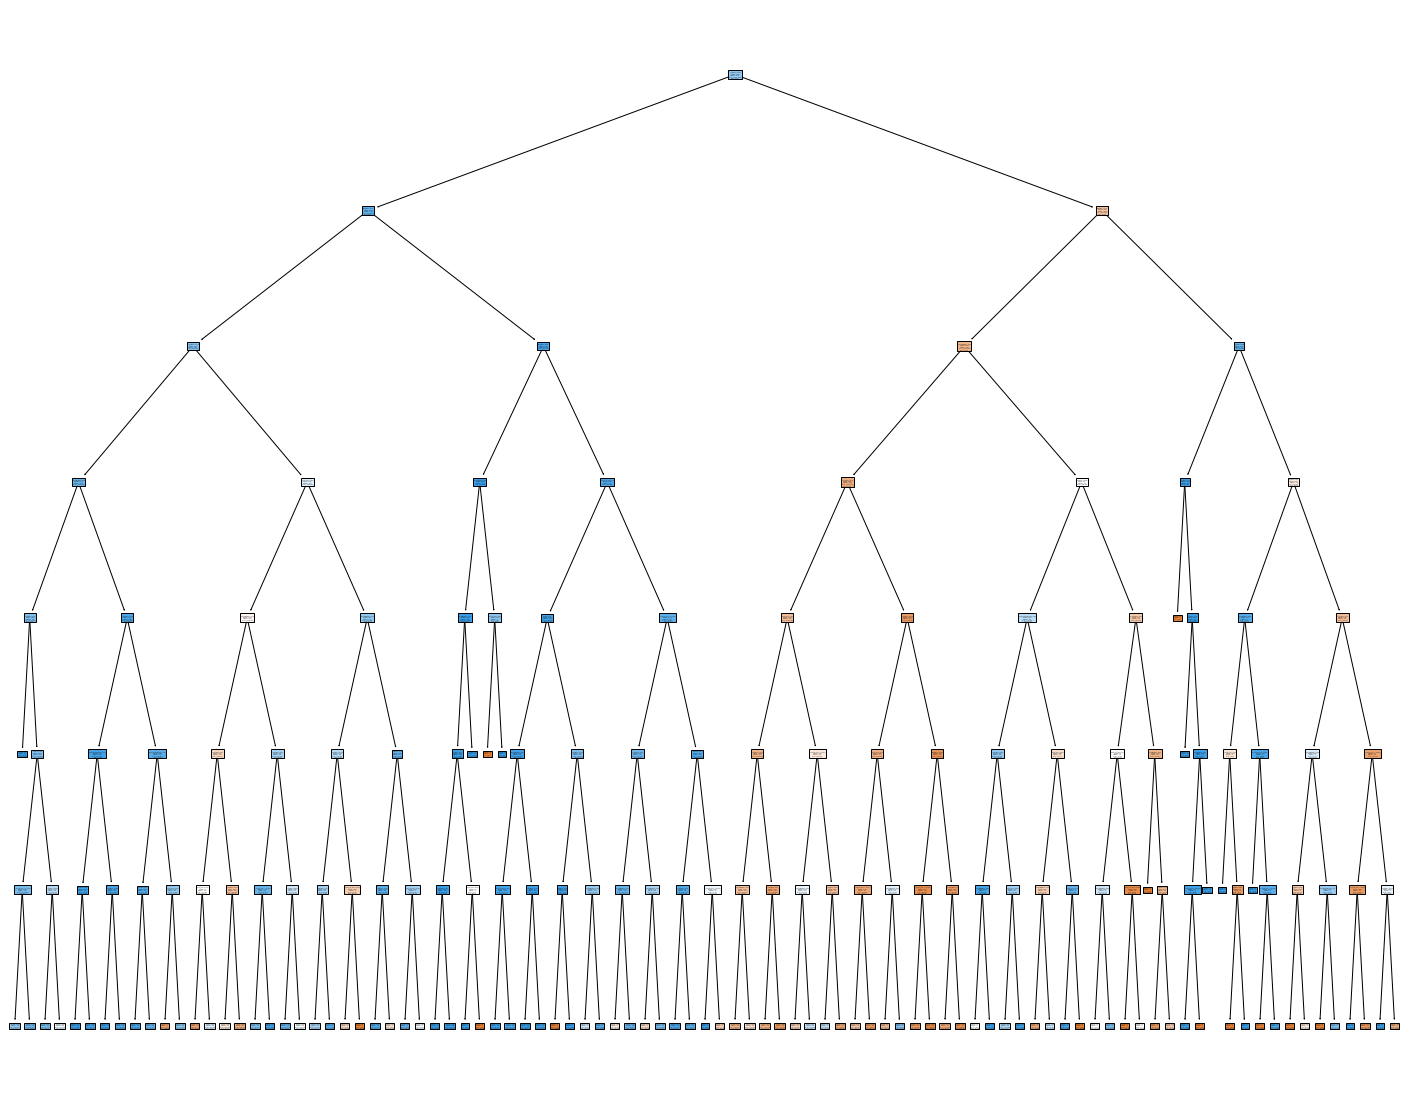

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_ori,
                   feature_names=X_ori.columns,
                   class_names=['Default', "Payoff"],
                   filled=True)

In [ ]:
dt_ori.feature_importances_
feature_imp = pd.Series(dt_ori.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

LTV_time                   0.552245
gdp_time                   0.260661
FICO_orig_time             0.067033
balance_time               0.030039
LTV_orig_time              0.023767
interval                   0.019891
interest_rate_time         0.018495
balance_orig_time          0.017413
Interest_Rate_orig_time    0.007447
mat_time                   0.001742
orig_time                  0.001266
REtype_SF_orig_time        0.000000
REtype_PU_orig_time        0.000000
REtype_CO_orig_time        0.000000
dtype: float64

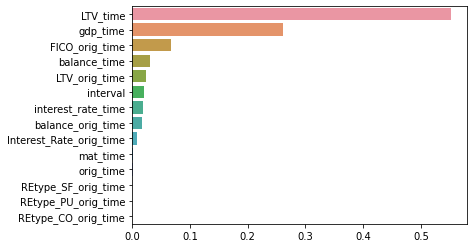

In [ ]:
sns.barplot(x=feature_imp,y=feature_imp.index)

# Light GBM with original features

## Default lightGBM Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ori, Y, test_size = 0.3, random_state = 42)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8337362713269324

Hyperparameter Tuning

In [ ]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'categorical_feature': 'auto'}

In [ ]:
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform
# param_test ={'num_leaves': sp_randint(6, 50), 
#              'min_child_samples': sp_randint(100, 500), 
#              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#              'subsample': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
#              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# #n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
# clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000)
# gs = RandomizedSearchCV(
#     estimator=clf, param_distributions=param_test, 
#     n_iter=100,
#     scoring='roc_auc',
#     cv=5,
#     refit=True,
#     random_state=42,
#     verbose=1)

In [ ]:
# gs.fit(X_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
# final_parameters = gs.best_params_

In [ ]:
# final_parameters

In [ ]:
# final_best_score_roc = gs.best_score_
# final_best_score_roc

Unbalanced Classes Hyper Parameter Tuning

In [ ]:
# clf_sw = lgb.LGBMClassifier(**clf.get_params())
# #set optimal parameters
# clf_sw.set_params(**final_parameters)

In [ ]:
# gs_sample_weight = GridSearchCV(estimator=clf_sw, 
#                                 param_grid={'scale_pos_weight':[1,2,3,4,0.45,0.7]},
#                                 scoring='roc_auc',
#                                 cv=5,
#                                 refit=True,
#                                 verbose=False)

In [ ]:
# gs_sample_weight.fit(X_train, y_train, **fit_params)
# print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Final LightGBM Model

In [ ]:
# gbm_ori = lgb.LGBMClassifier(**clf.get_params())
gbm_ori = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8818838538279375, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=424, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=39, objective=None,
               random_state=42, reg_alpha=7, reg_lambda=20, silent=True,
               subsample=0.6286197472598067, subsample_for_bin=200000,
               subsample_freq=0)
#set optimal parameters
# gbm_ori.set_params(**final_parameters)

gbm_ori.fit(X_train, y_train, **fit_params)

[1]	valid's auc: 0.85747
Training until validation scores don't improve for 30 rounds.
[2]	valid's auc: 0.861656
[3]	valid's auc: 0.866594
[4]	valid's auc: 0.869092
[5]	valid's auc: 0.871504
[6]	valid's auc: 0.873716
[7]	valid's auc: 0.875894
[8]	valid's auc: 0.876692
[9]	valid's auc: 0.877327
[10]	valid's auc: 0.877928
[11]	valid's auc: 0.87851
[12]	valid's auc: 0.879097
[13]	valid's auc: 0.879444
[14]	valid's auc: 0.879809
[15]	valid's auc: 0.880405
[16]	valid's auc: 0.880926
[17]	valid's auc: 0.881857
[18]	valid's auc: 0.882457
[19]	valid's auc: 0.882756
[20]	valid's auc: 0.883121
[21]	valid's auc: 0.883653
[22]	valid's auc: 0.884019
[23]	valid's auc: 0.884599
[24]	valid's auc: 0.884789
[25]	valid's auc: 0.88522
[26]	valid's auc: 0.885555
[27]	valid's auc: 0.886005
[28]	valid's auc: 0.886466
[29]	valid's auc: 0.88684
[30]	valid's auc: 0.887159
[31]	valid's auc: 0.887311
[32]	valid's auc: 0.887676
[33]	valid's auc: 0.88796
[34]	valid's auc: 0.888341
[35]	valid's auc: 0.888617
[36]	va

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8818838538279375, importance_type='split',
               learning_rate=0.1, max_depth=-1, metric='None',
               min_child_samples=424, min_child_weight=0.1, min_split_gain=0.0,
               n_estimators=5000, n_jobs=4, num_leaves=39, objective=None,
               random_state=42, reg_alpha=7, reg_lambda=20, silent=True,
               subsample=0.6286197472598067, subsample_for_bin=200000,
               subsample_freq=0)

Model Accuracy on Train Set

In [ ]:
y_pred = gbm_ori.predict(X_train)
accuracy_score(y_train,y_pred)

0.8671285194066969

Model Accuracy on Test Set

In [ ]:
y_pred = gbm_ori.predict(X_test)
accuracy_score(y_test,y_pred)

0.8356012986115908

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8661259541984733
0.9028247463696042
0.8840946722509009


In [ ]:
feature_imp = pd.Series(gbm_ori.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

balance_time               1139
FICO_orig_time             1126
balance_orig_time          1013
LTV_time                    962
interval                    917
gdp_time                    884
interest_rate_time          777
Interest_Rate_orig_time     694
LTV_orig_time               528
mat_time                    463
orig_time                   450
REtype_SF_orig_time          17
REtype_CO_orig_time          17
REtype_PU_orig_time           5
dtype: int64

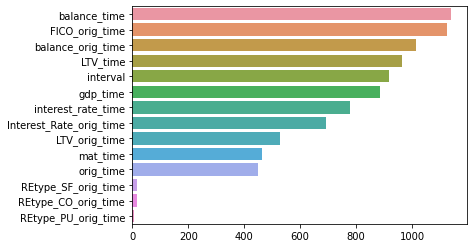

In [ ]:
sns.barplot(x=feature_imp,y=feature_imp.index)

In [ ]:
#gbm_ori.booster_.save_model('light_gbm.txt')
#lgbm.booster_.load_model('taxi_light.txt')

## SVC With Original features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ori, Y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
svc = SVC(C=1.0, random_state=42, kernel='linear',probability=True)
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svc.predict(X_test_std)
accuracy_score(y_test,y_pred)

0.8039649098570145

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8276425717399201
0.9065048736821165
0.8652805468527484


In [ ]:
cm =confusion_matrix(y_test,y_predict)
#sns.heatmap(cm,annot=True)
cm

array([[1969, 2454],
       [ 684, 9370]])

In [ ]:
y_test.head()

23468    0
32676    1
25516    0
23848    0
29861    1
Name: status_time, dtype: int64

In [ ]:
X_ori.head()

,interval,orig_time,mat_time,balance_time,LTV_time,interest_rate_time,gdp_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time
0,24,-7,113,0.646382,26.658065,9.200,2.715903,0,0,1,45000.0,715,69.4,9.200
1,2,18,138,0.985586,65.469851,7.680,2.151365,0,0,1,107200.0,558,80.0,7.680
2,5,-6,114,0.913140,31.459735,11.375,1.692969,0,0,1,48600.0,680,83.6,8.750
3,35,-2,119,0.826453,34.898842,10.500,2.836358,0,0,1,63750.0,587,81.8,10.500
4,3,18,138,0.986756,66.346343,9.155,2.361722,0,0,1,52800.0,527,80.0,9.155


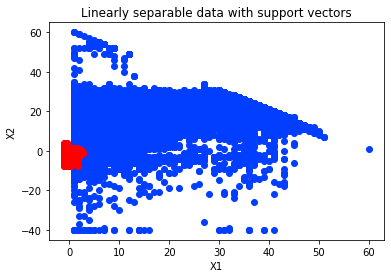

In [ ]:
support_vectors = svc.support_vectors_

# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

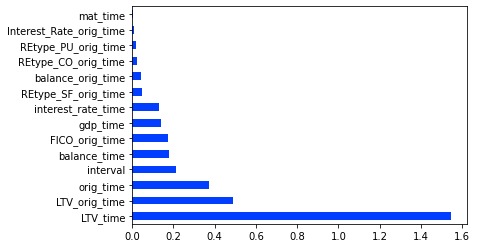

In [ ]:
pd.Series(abs(svc.coef_[0]), index=X_ori.columns).nlargest(20).plot(kind='barh')

## ANN with Original features

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_ori,Y,test_size=0.3,random_state=42)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
Y_ann = pd.get_dummies(Y)
Y_ann.head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
#len(Y)

In [ ]:
X_train.head()
X_train.shape[1]

14

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(units = 128,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(units = 64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1,activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_std,y_train,batch_size=64,epochs=100)
score,acc = model.evaluate(X_train_std,y_train,batch_size=64)

y_pred = model.predict(X_test_std)

score,acc = model.evaluate(X_test_std,y_test,batch_size=64)
print('Test Score:',score)
print('Test acc:',acc)

#cm = confusion_matrix(y_test,y_pred)

Epoch 1/100
528/528 [==============================] - 2s 2ms/step - loss: 0.4812 - accuracy: 0.7704
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8237
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3969 - accuracy: 0.8224
Epoch 4/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3955 - accuracy: 0.8249
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3895 - accuracy: 0.8276
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8297
Epoch 7/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3866 - accuracy: 0.8273
Epoch 8/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8296
Epoch 9/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3750 - accuracy: 0.8330
Epoch 10/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3729 - accura

In [ ]:
y_pred = model.predict(X_test_std)

In [ ]:
y_pred

array([[0.13544542],
       [0.5986801 ],
       [0.7752988 ],
       ...,
       [0.9913103 ],
       [0.22779992],
       [0.3967135 ]], dtype=float32)

In [ ]:
pred = [int(round(x[0])) for x in y_pred]

In [ ]:
accuracy_score(y_test,pred)

0.8078331145955654

In [ ]:
y_pred_train = model.predict(X_train_std)
rounded_train = [int(round(x[0])) for x in y_pred_train]
accuracy_score(y_train,rounded_train)

0.8796814400331586

In [ ]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

0.8392423959693973
0.8946687885418739
0.8660697092239554


## ROC AUC Curves

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_ori,Y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


models = [dt_ori,gbm_ori]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])

# Train the models and record the results
for m in models:
    #model = cls.fit(X_train, y_train)
    yproba = m.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':m.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
models = [model]
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

for m in models:
    #model = cls.fit(X_train, y_train)
    yproba = m.predict_proba(X_test_std)
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':m.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
models = [svc]
for m in models:
    #model = cls.fit(X_train, y_train)
    yproba = m.predict_proba(X_test_std)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':m.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

models = [dt_ori,gbm_ori,model,svc]
# Set name of the classifiers as index labels
result_table.set_index('models', inplace=True)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


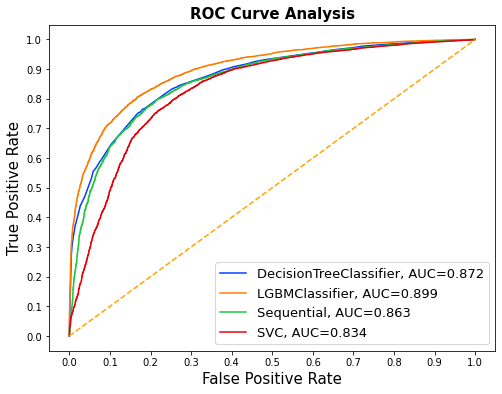

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# Decision Tree with PCA features

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.3,random_state=42)

In [ ]:
y_train.head()

15423    1
13270    1
7840     0
14454    1
8586     1
Name: status_time, dtype: int64

In [ ]:
parameters = {'max_depth':range(3,20)}

clf = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5,scoring='roc_auc',n_jobs=-1)
clf.fit(x_train,y_train)
tree_model = clf.best_estimator_
print(clf.best_score_,clf.best_params_)

0.8317927475715354 {'max_depth': 7}


In [ ]:
final_parameters_dt_pca = clf.best_params_

In [ ]:
dt_pca = DecisionTreeClassifier(**final_parameters_dt_pca,random_state=42)
dt_pca.fit(x_train,y_train)
pred = dt_pca.predict(x_test)
accuracy_score(y_test,pred)

0.7900808178490019

In [ ]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

0.8263094241324774
0.8834294808036602
0.8539153006777869


In [ ]:
dt_pca.feature_importances_
feature_imp = pd.Series(dt_pca.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp

0    0.555122
1    0.266258
4    0.036542
2    0.034855
7    0.033426
6    0.024514
3    0.021547
8    0.019838
5    0.007898
dtype: float64

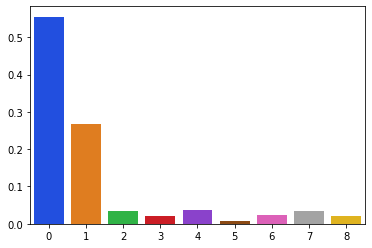

In [ ]:
sns.barplot(y=feature_imp,x=feature_imp.index)

#LightGBM with PCA Features

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8
0,-4.697451,-0.647586,-1.020169,-0.655052,0.398027,0.327129,1.053273,0.143629,1.337081
1,-0.831435,1.440164,0.380839,-0.055362,-0.818311,0.243329,-0.170239,-0.015788,-0.663265
2,-3.786651,1.688106,-0.043073,-0.724461,1.447341,0.505046,0.945848,0.136885,1.132828
3,-3.965859,0.757027,-1.334256,0.556655,-0.354949,0.664181,0.537643,1.507283,1.384380
4,-1.136089,2.152391,0.080736,-0.016136,-1.234268,0.420658,-0.218898,0.003798,-0.402909


In [ ]:
x.shape

(48254, 9)

Final LightGBM Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 42)

In [ ]:
import lightgbm as lgb
gbm_pca = lgb.LGBMClassifier()
gbm_pca.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
pred = gbm_pca.predict(X_test)
accuracy_score(y_test,pred)

0.8136354217033915

In [ ]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

0.8456117271189626
0.8950666401432266
0.8696366447622729


In [ ]:
feature_imp = pd.Series(gbm_pca.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

1    395
3    365
4    338
2    337
7    333
0    333
8    331
5    291
6    277
dtype: int64

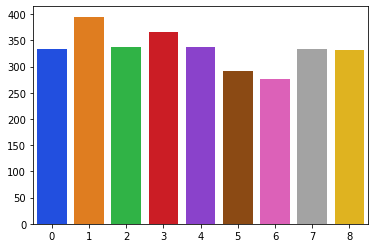

In [ ]:
sns.barplot(y=feature_imp,x=feature_imp.index)

##SVC with PCA features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
svc_pca = SVC(C=1.0, random_state=42, kernel='linear',probability=True)
 
# Fit the model
svc_pca.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_predict = svc_pca.predict(X_test)
accuracy_score(y_test,y_predict)

0.783242384471921

In [ ]:
print(precision_score(y_test,y_predict))
print(recall_score(y_test,y_predict))
print(f1_score(y_test,y_predict))

0.7924560216508796
0.9319673761686891
0.8565682420696591


In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8
0,-4.697451,-0.647586,-1.020169,-0.655052,0.398027,0.327129,1.053273,0.143629,1.337081
1,-0.831435,1.440164,0.380839,-0.055362,-0.818311,0.243329,-0.170239,-0.015788,-0.663265
2,-3.786651,1.688106,-0.043073,-0.724461,1.447341,0.505046,0.945848,0.136885,1.132828
3,-3.965859,0.757027,-1.334256,0.556655,-0.354949,0.664181,0.537643,1.507283,1.384380
4,-1.136089,2.152391,0.080736,-0.016136,-1.234268,0.420658,-0.218898,0.003798,-0.402909


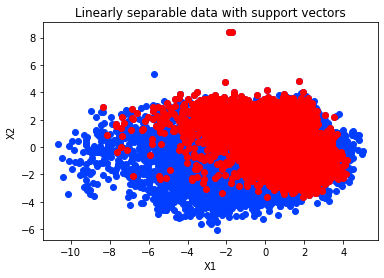

In [ ]:
support_vectors = svc_pca.support_vectors_

# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

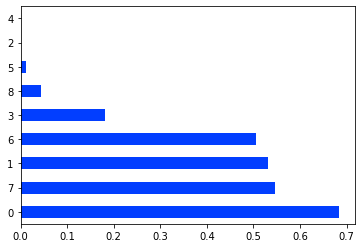

In [ ]:
pd.Series(abs(svc_pca.coef_[0]), index=x.columns).nlargest(20).plot(kind='barh')

## ANN with PCA Features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
model_pca = Sequential()
model_pca.add(Dense(units = 128,activation='relu',input_dim=X_train.shape[1]))
model_pca.add(Dense(units = 64,activation='relu'))
model_pca.add(Dropout(0.1))
model_pca.add(Dense(units = 32,activation='relu'))
model_pca.add(Dropout(0.1))
model_pca.add(Dense(units = 16,activation='relu'))
model_pca.add(Dropout(0.1))
model_pca.add(Dense(units = 1,activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model_pca.compile(optimizer = opt, loss='binary_crossentropy',metrics=['accuracy'])

model_pca.fit(X_train,y_train,batch_size=64,epochs=100)
score,acc = model_pca.evaluate(X_train,y_train,batch_size=64)

y_pred = model_pca.predict(X_test)

score,acc = model_pca.evaluate(X_test,y_test,batch_size=64)
print('Test Score:',score)
print('Test acc:',acc)

#cm = confusion_matrix(y_test,y_pred)

Epoch 1/100
528/528 [==============================] - 2s 2ms/step - loss: 0.4740 - accuracy: 0.7755
Epoch 2/100
528/528 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8161
Epoch 3/100
528/528 [==============================] - 1s 2ms/step - loss: 0.4078 - accuracy: 0.8178
Epoch 4/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8246
Epoch 5/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8270
Epoch 6/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3911 - accuracy: 0.8276
Epoch 7/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3909 - accuracy: 0.8272
Epoch 8/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3802 - accuracy: 0.8305
Epoch 9/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8314
Epoch 10/100
528/528 [==============================] - 1s 2ms/step - loss: 0.3823 - accura

In [ ]:
y_pred = model_pca.predict(X_test)
y_pred

array([[0.02341267],
       [0.45565262],
       [0.7895744 ],
       ...,
       [0.9878605 ],
       [0.06983069],
       [0.19612521]], dtype=float32)

In [ ]:
rounded = [int(round(x[0])) for x in y_pred]

In [ ]:
accuracy_score(y_test,rounded)

0.8206120052497065

In [ ]:
print(precision_score(y_test,rounded))
print(recall_score(y_test,rounded))
print(f1_score(y_test,rounded))

0.8588892097410723
0.8875074597175253
0.8729638507068433


In [ ]:
y_pred_train = model_pca.predict(X_train)
rounded_train = [int(round(x[0])) for x in y_pred_train]
accuracy_score(y_train,rounded_train)

0.8686976344850046

## ROC Curve for models on PCA features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


models = [dt_pca,gbm_pca,svc_pca]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['models', 'fpr','tpr','auc'])

# Train the models and record the results
for m in models:
    #model = cls.fit(X_train, y_train)
    yproba = m.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':m.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
models = [model_pca]

for m in models:
    #model = cls.fit(X_train, y_train)
    yproba = m.predict_proba(X_test)
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'models':m.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

models = [dt_pca,gbm_pca,svc_pca,model_pca]
# Set name of the classifiers as index labels
result_table.set_index('models', inplace=True)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


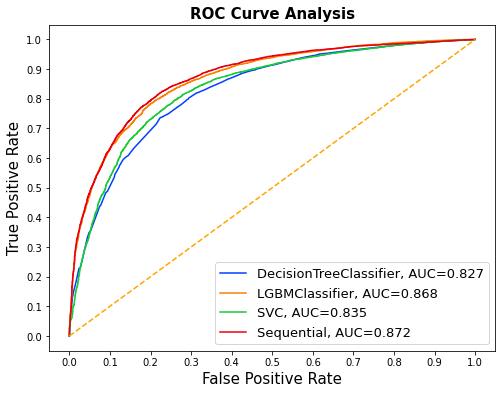

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()